In [1]:
import pandas as pd 
import numpy as np


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('data\music_data.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.isnull().sum()
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [4]:
#function to take the input and compare it to lyrics
"""
algorithim:
declare lyrics and genre of music

def myfunc(usr_input):
    df_filt = (df['lyrics'] == 'usr_input')
df[df_bk]
        
"""
df['lyrics']

0        hold time feel break feel untrue convince spea...
1        believe drop rain fall grow believe darkest ni...
2        sweetheart send letter goodbye secret feel bet...
3        kiss lips want stroll charm mambo chacha merin...
4        till darling till matter know till dream live ...
                               ...                        
28367    cause fuck leave scar tick tock clock come kno...
28368    minks things chain ring braclets yap fame come...
28369    get ban get ban stick crack relax plan attack ...
28370    check check yeah yeah hear thing call switch g...
28371    remix killer alive remix thriller trap bitch s...
Name: lyrics, Length: 28372, dtype: object

In [5]:
df['genre']

0            pop
1            pop
2            pop
3            pop
4            pop
          ...   
28367    hip hop
28368    hip hop
28369    hip hop
28370    hip hop
28371    hip hop
Name: genre, Length: 28372, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


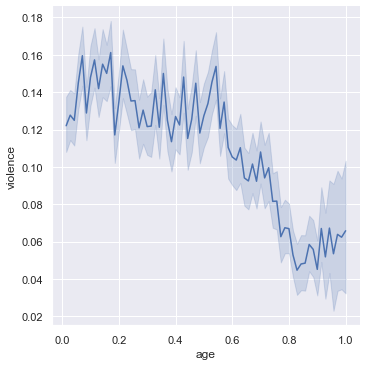

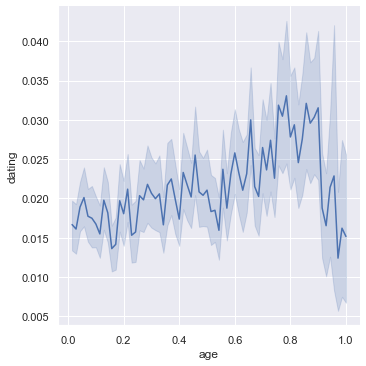

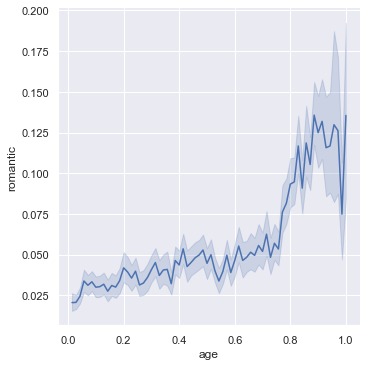

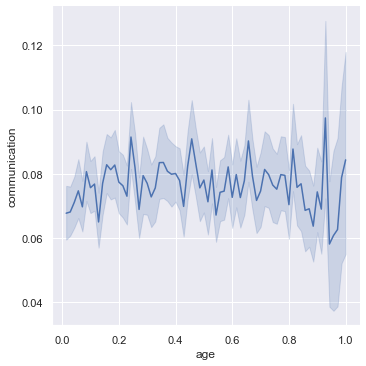

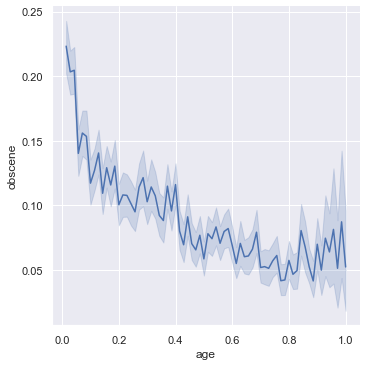

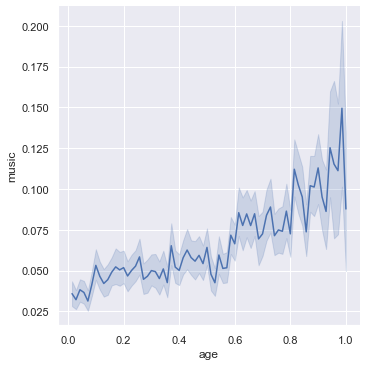

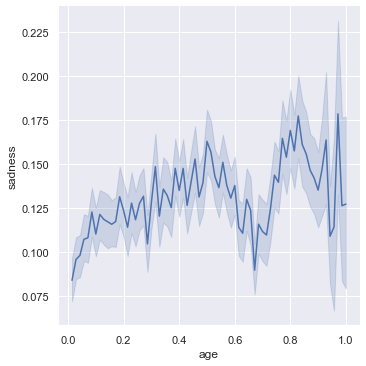

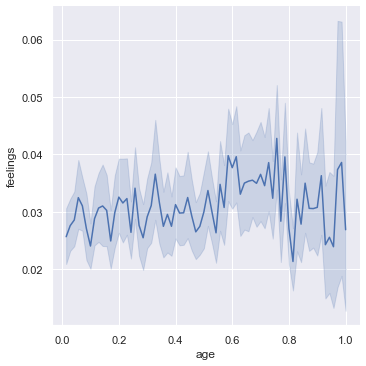

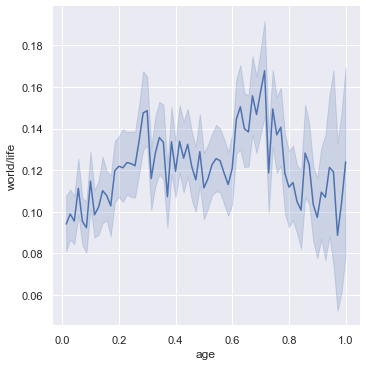

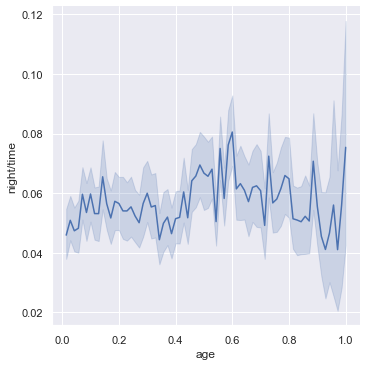

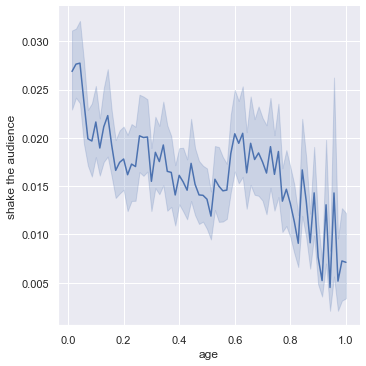

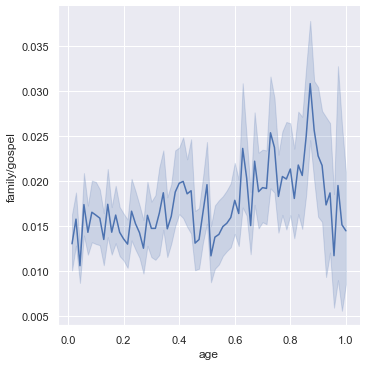

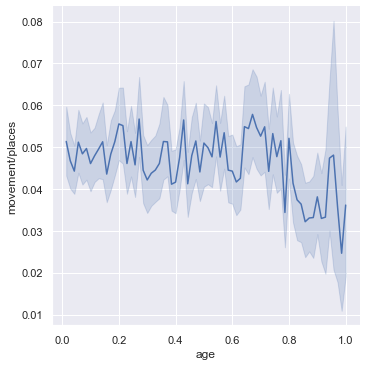

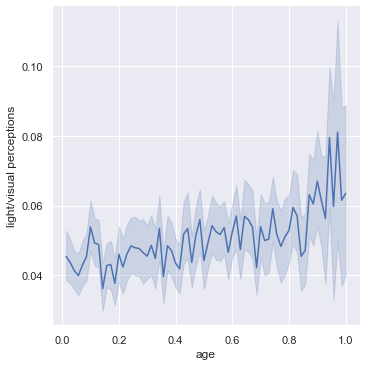

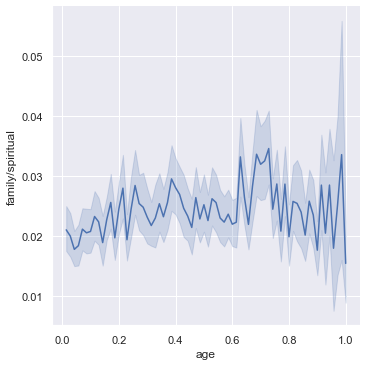

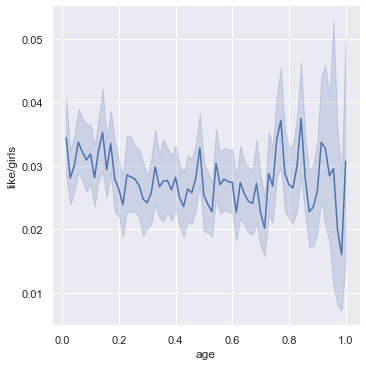

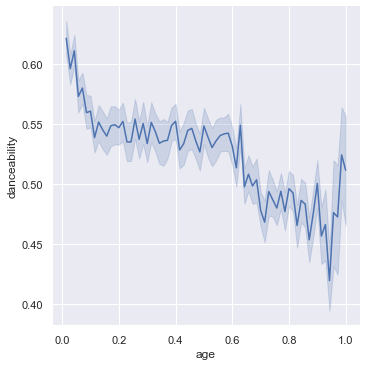

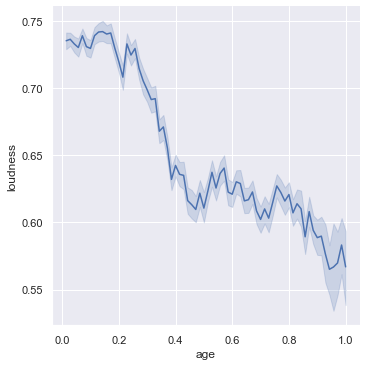

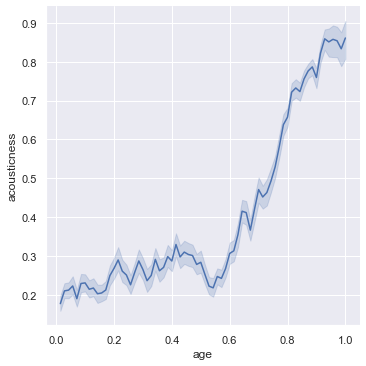

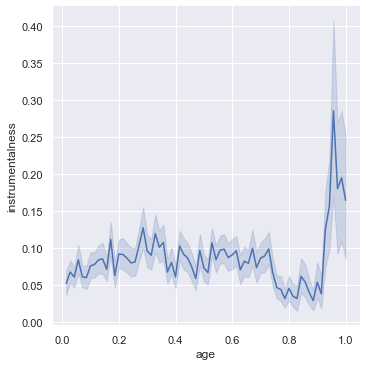

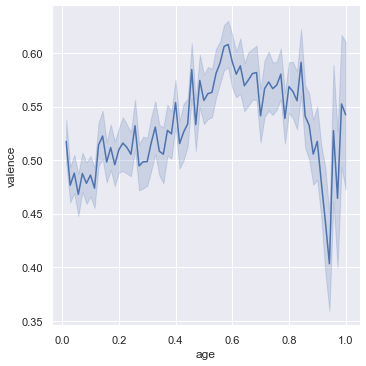

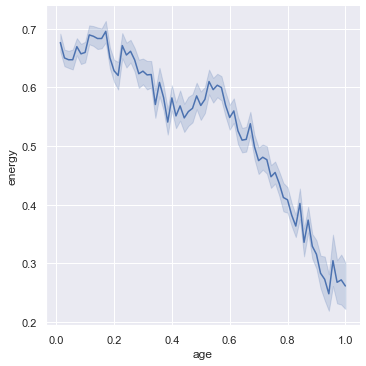

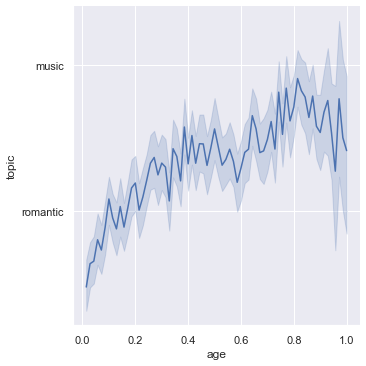

In [6]:
all_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings',
               'world/life', 'night/time', 'shake the audience', 'family/gospel', 'movement/places', 'light/visual perceptions',
               'family/spiritual', 'like/girls', 'danceability', 'loudness', 'acousticness', 'instrumentalness',
               'valence', 'energy', 'topic']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'age', kind = 'line', height = 5, aspect = 1)

In [7]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)    
    return input_string

df['message_clean'] = df['lyrics']

df['message_clean'] = df['lyrics'].apply(text_pipeline)

In [31]:
X = df['message_clean'].values

y = df['genre'].values

In [32]:
X[3]

'kiss lips want stroll charm mambo chacha meringue heaven arm japan brag geisha care long uncle eye starry sort gleam like million dollar dream come true everybody wish steal heart away guess try eye starry sort gleam like million dollar dream come true kiss lips want stroll charm japan brag geisha care long uncle'

In [10]:
#function to take the input and compare it to lyrics


In [11]:
#mask = np.column_stack([df['lyrics'].str.contains(r"hold", na=False) for col in df['lyrics']])
#df.loc[mask.any(axis=1)]

In [12]:
def CheckItExists(user_input,data_frame,col_num):
    if user_input in data_frame[col_num]:
        return True
    else:
        return False
CheckItExists("hold",X,0)
           

True

In [13]:
if CheckItExists("hold",X,12) == False:
    print("hello")

hello


In [14]:
for i in X:
    print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'
 'believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe'
 'sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy ha

In [15]:
#Filtering = ["Lyrics" , "genre"]
filtering = ["pop"]
SelectedTopics = df.genre.isin(filtering)
df[SelectedTopics]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,message_clean
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000,hold time feel break feel untrue convince spea...
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000,believe drop rain fall grow believe darkest ni...
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000,sweetheart send letter goodbye secret feel bet...
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000,kiss lips want stroll charm mambo chacha merin...
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000,till darling till matter know till dream live ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,20269,florida georgia line,simple,2019,pop,finger plus rocket science time hard true road...,104,0.000605,0.000605,0.582178,...,0.000605,0.325246,0.818911,0.079417,0.000000,0.866035,0.882879,world/life,0.014286,finger plus rocket science time hard true road...
7038,20273,drake,how bout now,2019,pop,shit talk bout like change fuckin link dash aw...,179,0.000333,0.000333,0.015029,...,0.009746,0.787718,0.699767,0.205822,0.000000,0.462077,0.404386,obscene,0.014286,shit talk bout like change fuckin link dash aw...
7039,20281,jonas brothers,i believe,2019,pop,night lifetime yeah know fine cause stay good ...,117,0.059642,0.000450,0.522350,...,0.014017,0.744395,0.754711,0.086043,0.000012,0.336356,0.774768,world/life,0.014286,night lifetime yeah know fine cause stay good ...
7040,20286,ellie goulding,sixteen,2019,pop,remember move say small house change save give...,90,0.000835,0.000835,0.387109,...,0.089554,0.657749,0.774607,0.269076,0.000000,0.533182,0.801796,world/life,0.014286,remember move say small house change save give...


In [16]:
filtering = ["hold"]
SelectedTopics = df.lyrics.isin(filtering)
df[SelectedTopics]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,message_clean


In [17]:

df['lyrics'].str.contains('hold')

0         True
1        False
2        False
3        False
4         True
         ...  
28367    False
28368     True
28369    False
28370    False
28371    False
Name: lyrics, Length: 28372, dtype: bool

In [18]:
def checker(data_frame,user_input,lyrics):
    data_frame = df['lyrics']
    data_frame.str.contains('hold')
    

In [19]:
print(checker(df,"hold",'lyrics'))

None


In [20]:
X = ['message_clean', 'genre','artist_name']
df1 = pd.DataFrame(df, columns=X)

In [21]:
df1.head()

,message_clean,genre,artist_name
0,hold time feel break feel untrue convince spea...,pop,mukesh
1,believe drop rain fall grow believe darkest ni...,pop,frankie laine
2,sweetheart send letter goodbye secret feel bet...,pop,johnnie ray
3,kiss lips want stroll charm mambo chacha merin...,pop,pérez prado
4,till darling till matter know till dream live ...,pop,giorgos papadopoulos


In [22]:
df1['message_clean'].str.contains('hold')

0         True
1        False
2        False
3        False
4         True
         ...  
28367    False
28368     True
28369    False
28370    False
28371    False
Name: message_clean, Length: 28372, dtype: bool

In [47]:
c1 = df['message_clean'].str.contains('hold')
c3 = df['message_clean'].str.contains('time')
# Second select condition.
c2 = df['artist_name']

# Set equal to one when both conditions are true, and zero when not true.
df['Checker'] =  np.where( c1 & c3, 1, 0 )

# Sanity check to view if our assignment worked correctly.
select_statement = df['Checker'] == 1

df[ select_statement ]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,message_clean,Checker
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000,hold time feel break feel untrue convince spea...,1
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000,till darling till matter know till dream live ...,1
46,126,los hermanos arriagada,poema,1954,pop,night mind deep dream till time look eye touch...,55,0.057994,0.000940,0.355957,...,0.547276,0.508371,0.738956,0.000000,0.749588,0.314293,sadness,0.942857,night mind deep dream till time look eye touch...,1
63,185,ted heath,to you my love,1955,pop,long finish patrol light burn distance dare so...,135,0.000566,0.321891,0.000566,...,0.579768,0.501449,0.939759,0.000001,0.668178,0.295273,violence,0.928571,long finish patrol light burn distance dare so...,1
79,244,harry belafonte,i do adore her,1956,pop,shadow fall star appear pain feel relive faith...,78,0.001224,0.001224,0.162519,...,0.666414,0.560136,0.973896,0.000000,0.861913,0.289267,sadness,0.914286,shadow fall star appear pain feel relive faith...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28294,82349,tyron blackshit,bunny hop,2019,hip hop,time somebody life line start slip years go bi...,85,0.000907,0.082185,0.099456,...,0.855951,0.673564,0.050702,0.000000,0.510511,0.492477,obscene,0.014286,time somebody life line start slip years go bi...,1
28299,82354,flipmode squad,this is what happens,2019,hip hop,nigga digga rampage word street flipmode arise...,110,0.000774,0.000774,0.000774,...,0.727066,0.809810,0.082730,0.000129,0.672300,0.827822,obscene,0.014286,nigga digga rampage word street flipmode arise...,1
28311,82369,rakim,it's the r,2019,hip hop,lowkey need host brand know flow cause swerve ...,176,0.033931,0.000543,0.000543,...,0.811546,0.669051,0.150602,0.000000,0.845425,0.582570,obscene,0.014286,lowkey need host brand know flow cause swerve ...,1
28313,82371,denzel curry,equalizer,2019,hip hop,ultimate equalizer synthesizer ultimately brut...,149,0.000658,0.145060,0.000658,...,0.757392,0.771325,0.003523,0.002176,0.350783,0.537523,obscene,0.014286,ultimate equalizer synthesizer ultimately brut...,1


In [58]:
def myfunc(df1,word1):
    
    
    if df['message_clean'].str.contains(word1):
        df['commonword'] = df['message_clean']
    print(df['commonword'])
    
myfunc(df['message_clean'],"hold")



AttributeError: module 'pandas' has no attribute 'df1'

In [53]:
type(df['message_clean'])
   

pandas.core.series.Series

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

